In [28]:
import pandas as pd
import matplotlib.pyplot as plt
#import geopandas as gpd
import numpy as np
import seaborn as sns
#https://getbootstrap.com/docs/4.0/components/alerts/

bsas_map = gpd.read_file('../../gopa_data/barrios-ciudad')


fig,ax = plt.subplots(figsize = (10,10))
bsas_map.plot(ax=ax)

In [2]:
df = pd.read_csv('../coordinates_data.csv')

In [3]:
df.head() #primer vistazo

,search_longitude,search_latitude,arrive,leave,search_method,timestamp,geometry,x,y,new_x,new_y,arrive_date,dayOfWeek
0,-58.440447,-34.620694,2021-02-28 15:56:00+00:00,2021-02-28 17:32:00+00:00,google,2021-01-31T19:35:42.438-03:00,POINT (-58.44044719999999 -34.62069375),-58.440447,-34.620694,0.097696,0.084863,2021-02-28,6
1,-58.418288,-34.581668,2021-02-13 15:12:45.668000+00:00,2021-02-13 16:12:45.668000+00:00,searchInThisArea,2021-02-13T12:13:03.714-03:00,POINT (-58.41828804463148 -34.58166840120946),-58.418288,-34.581668,0.119855,0.123889,2021-02-13,5
2,-58.208933,-34.831096,2021-01-25 17:45:27.320000+00:00,2021-01-25 18:45:27.320000+00:00,searchInThisArea,2021-01-25T14:45:44.753-03:00,POINT (-58.20893257856369 -34.83109589037829),-58.208933,-34.831096,0.329210,-0.125539,2021-01-25,0
3,-58.454943,-34.564354,2021-02-25 11:20:09.755000+00:00,2021-02-25 12:20:09.755000+00:00,searchInThisArea,2021-02-25T08:22:32.254-03:00,POINT (-58.454943113029 -34.56435426830171),-58.454943,-34.564354,0.083200,0.141203,2021-02-25,3
4,-58.451924,-34.559296,2020-09-17 10:45:00+00:00,2020-09-17 11:00:00+00:00,update_time_home,2020-09-17T08:13:03.302GMT-03:00,POINT (-58.45192389999999 -34.5592956),-58.451924,-34.559296,0.086219,0.146261,2020-09-17,3


In [4]:
df.shape 

(7406, 13)

In [5]:
df.columns #vistazo de columnas. se repiten algunas coosas no?

Index(['search_longitude', 'search_latitude', 'arrive', 'leave',
       'search_method', 'timestamp', 'geometry', 'x', 'y', 'new_x', 'new_y',
       'arrive_date', 'dayOfWeek'],
      dtype='object')

In [6]:
print(df.search_longitude.equals(df.x))
print(df.search_latitude.equals(df.y))

True
True


<p class="alert alert-block alert-info">
    eliminamos algunas columnas. fragmentemos el dataset para poder analizarlo  mejor </p>

In [7]:
data = df.drop(columns = [ 'geometry', 'x', 'y', 'new_x', 'new_y',])

In [8]:
data.head()

,search_longitude,search_latitude,arrive,leave,search_method,timestamp,arrive_date,dayOfWeek
0,-58.440447,-34.620694,2021-02-28 15:56:00+00:00,2021-02-28 17:32:00+00:00,google,2021-01-31T19:35:42.438-03:00,2021-02-28,6
1,-58.418288,-34.581668,2021-02-13 15:12:45.668000+00:00,2021-02-13 16:12:45.668000+00:00,searchInThisArea,2021-02-13T12:13:03.714-03:00,2021-02-13,5
2,-58.208933,-34.831096,2021-01-25 17:45:27.320000+00:00,2021-01-25 18:45:27.320000+00:00,searchInThisArea,2021-01-25T14:45:44.753-03:00,2021-01-25,0
3,-58.454943,-34.564354,2021-02-25 11:20:09.755000+00:00,2021-02-25 12:20:09.755000+00:00,searchInThisArea,2021-02-25T08:22:32.254-03:00,2021-02-25,3
4,-58.451924,-34.559296,2020-09-17 10:45:00+00:00,2020-09-17 11:00:00+00:00,update_time_home,2020-09-17T08:13:03.302GMT-03:00,2020-09-17,3


<div class="alert alert-info" role="alert">
    <strong>pasemos la data temporal en datetime para poder plotear mejor</strong>
      <hr>
    <a href="https://strftime.org/">acá tenemos los posibles formatos de datetime</a>
</div>

In [9]:
dates_to_transform = ['arrive','leave']

In [10]:
data.arrive.head(1)  #año mes dia hora_ minuto : segundosss???

0    2021-02-28 15:56:00+00:00
Name: arrive, dtype: object

In [14]:
for i in ['arrive','leave']:
    data[i] = pd.to_datetime(data[i])

In [17]:
#data['timestamp'] = pd.to_datetime('timestamp') # da error

<div class="alert alert-danger" role="alert">
    <strong>el timestamp tiene un formato extremadamente raro, hay que chequear que onda porque ahí es donde está la información más rica</strong>
</div>

<hr>

<AxesSubplot:xlabel='leave', ylabel='Count'>

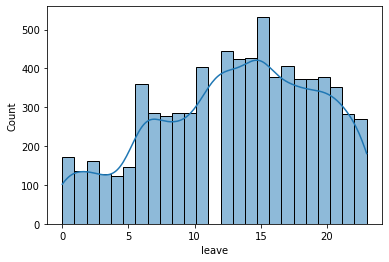

In [51]:
sns.histplot(data.leave.dt.hour, kde= True)

<AxesSubplot:xlabel='arrive', ylabel='Count'>

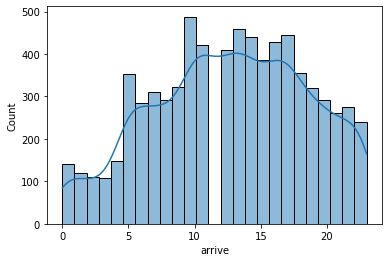

In [31]:
sns.histplot(data.arrive.dt.hour, kde= True)

In [39]:
data['arrive_hour'] = data.arrive.dt.hour

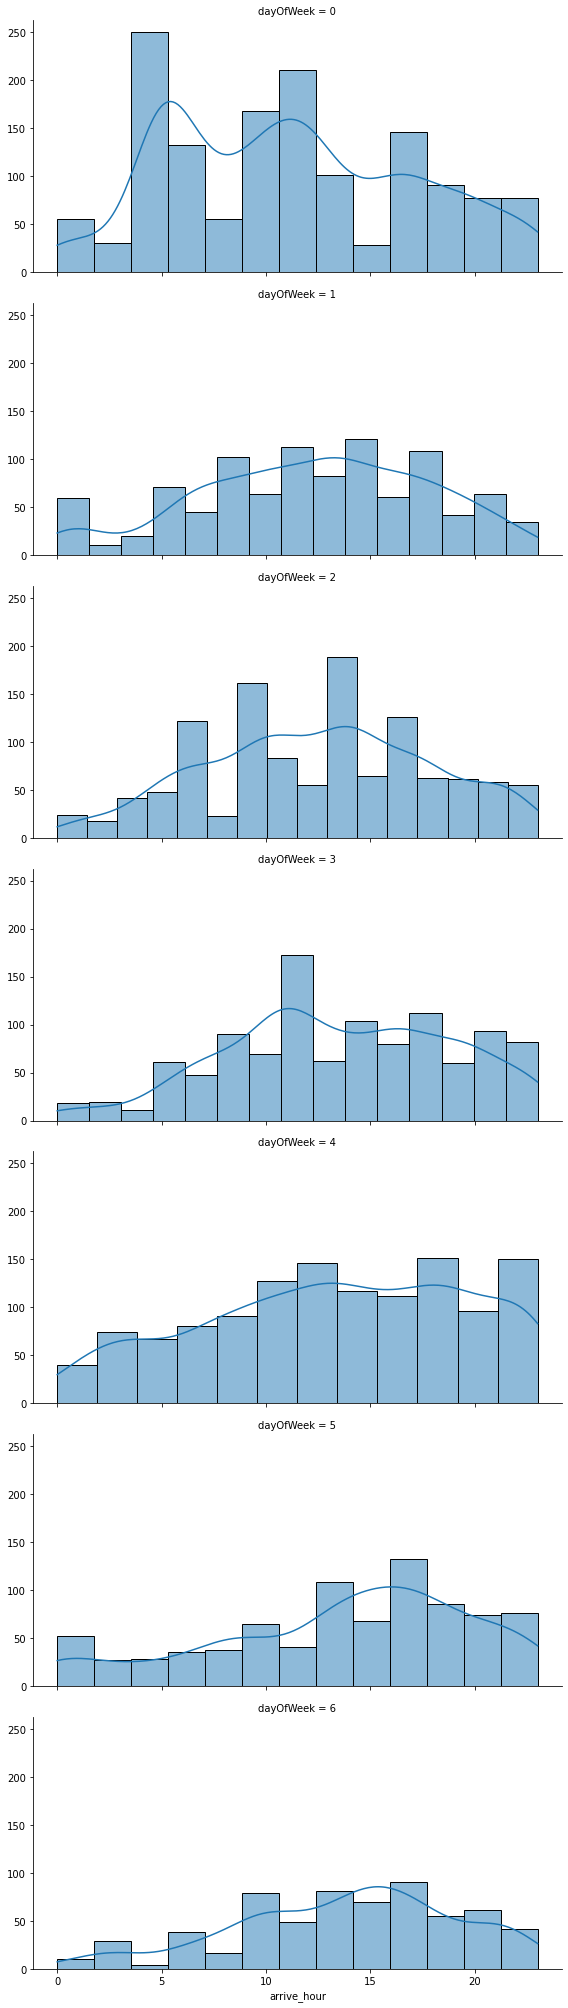

In [50]:
g = sns.FacetGrid(data, row="dayOfWeek", height=4, aspect=2)
g.map(sns.histplot, "arrive_hour", kde=True)

<div class="alert alert-danger" role="alert">
    hay que haces esto con el <strong>TIMESTAMP</strong>, el arrive hour no nos dice mucho
</div>